In [56]:
pip install prince==0.13.1


Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install -U matplotlib

Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from ucimlrepo import fetch_ucirepo 
import prince 
from matplotlib.colors import ListedColormap


In [63]:
  
# fetch dataset 
#dataset=pd.read_csv('./heart.csv',delimiter=',')
  
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
dataset = heart_disease.data.features 
y = heart_disease.data.targets 

y = pd.Series(y.values.flatten())

# Map target values as specified
dataset['target'] = y.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})



RemoteDisconnected: Remote end closed connection without response

**manel**

**Data Types Analysis and Usage**


In the Heart Disease dataset, the features can be classified into three main types: **continuous**, **categorical**, and **binary** (numerical but with only two possible values). 

Below, we categorize each attribute accordingly and describe how we will use them for **PCA, CA, MCA,** and (optionally) FAMD.

**1. Continuous Variables**

These variables represent numerical measurements that can take a wide range of values. They are ideal for Principal Component Analysis **(PCA)**.

* Age
* trestbps
* chol (Cholesterol)
* thalach (Maximum Heart Rate Achieved).
* oldpeak (ST Depression): 

We will apply PCA to the subset of continuous variables to identify the most significant components that explain the variance in these health indicators.

**2. Categorical Variables**

These variables take on a limited set of discrete values representing categories. For Correspondence Analysis **(CA)** and Multiple Correspondence Analysis **(MCA)**, categorical data is essential.

* cp (Chest Pain Type)  can take on of 4 values {1, 2, 3, 4}
* restecg (Resting Electrocardiographic Results): can take on of 3 values {0, 1, 2}
* slope (Slope of the Peak Exercise ST Segment):can take on of 3 values {0, 1, 2}
* ca (Number of Major Vessels Colored by Fluoroscopy): Values from 0 to 4.
* thal (Thalassemia):
0: Normal
1: Fixed defect
2: Reversible defect
Usage:

CA: We will select the two most informative categorical variables (e.g., cp and thal) to create a contingency table for Correspondence Analysis.
MCA: We will include all categorical variables to explore patterns and relationships among them.

**3. Binary Variables**
These are numerical variables that take on only two possible values, often representing "yes" or "no" conditions. While technically numerical, they are usually treated as categorical for analysis.

Sex:
0: Female
1: Male
fbs (Fasting Blood Sugar > 120 mg/dL):
0: No
1: Yes
exang (Exercise-Induced Angina):
0: No
1: Yes
Target Variable (heart disease):
0: No heart disease
1: Presence of heart disease
Usage:

These variables will be treated as categorical for the MCA analysis since they represent discrete categories.
For the target variable, we will use it as the outcome variable to interpret the results of our dimensionality reduction analyses.

In [64]:
dataset


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
print(dataset.isnull().any())

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca           True
thal         True
target      False
dtype: bool


In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

We have Tow categorical variable with No values (Ca, thal)

In [ ]:
#Display the rows containing missing values
dataset[dataset.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


---> Since we have only 6 rows with missing values, our approach will be to delete them to avoid disturbing our dimensionality reduction models.

In [65]:
cleaned_dataset = dataset.dropna()

In [66]:
cleaned_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1


# Correspondence Analysis (CA)

Before choosing the two variables on which we will perform Correspondence Analysis (CA), our approach is not to select them randomly, but to choose those that show the strongest correlation using a Corelation matrix 

In [153]:
only_categorical =cleaned_dataset[['target', 'cp', 'restecg', 'slope', 'ca', 'thal', 'sex', 'fbs', 'exang', 'age']]
only_categorical

,target,cp,restecg,slope,ca,thal,sex,fbs,exang,age
0,0,1,2,3,0.0,6.0,1,1,0,63
1,1,4,2,2,3.0,3.0,1,0,1,67
2,1,4,2,2,2.0,7.0,1,0,1,67
3,0,3,0,3,0.0,3.0,1,0,0,37
4,0,2,2,1,0.0,3.0,0,0,0,41
...,...,...,...,...,...,...,...,...,...,...
297,1,4,0,2,0.0,7.0,0,0,1,57
298,1,1,0,2,0.0,7.0,1,0,0,45
299,1,4,0,2,2.0,7.0,1,1,0,68
300,1,4,0,2,1.0,7.0,1,0,1,57


In [68]:
only_categorical.describe()

,target,cp,restecg,slope,ca,thal,sex,fbs,exang
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,0.461279,3.158249,0.996633,1.602694,0.676768,4.730640,0.676768,0.144781,0.326599
std,0.499340,0.964859,0.994914,0.618187,0.938965,1.938629,0.468500,0.352474,0.469761
min,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,2.000000,0.000000,3.000000,1.000000,0.000000,0.000000
75%,1.000000,4.000000,2.000000,2.000000,1.000000,7.000000,1.000000,0.000000,1.000000
max,1.000000,4.000000,2.000000,3.000000,3.000000,7.000000,1.000000,1.000000,1.000000


In [69]:
only_categorical['thal'].value_counts()

thal
3.0    164
7.0    115
6.0     18
Name: count, dtype: int64

2  csv-- 3
3 CSV -- 7
1  cvs -- 6


In [70]:
# Filtrer les lignes en fonction des valeurs connues
condition = (
    (dataset['age'] == 44) 
    & (dataset['thal']==6)

)

# Filtrer le DataFrame pour obtenir la ligne correspondante
specific_row = dataset.loc[condition]

# Afficher la valeur de 'thal' dans cette ligne
thal_value = specific_row # On suppose qu'il y a une seule ligne qui correspond
thal_value

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
292,44,1,4,120,169,0,0,144,1,2.8,3,0.0,6.0,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target

44,1,0,120,169,0,1,144,1,2.8,0,0,1,0

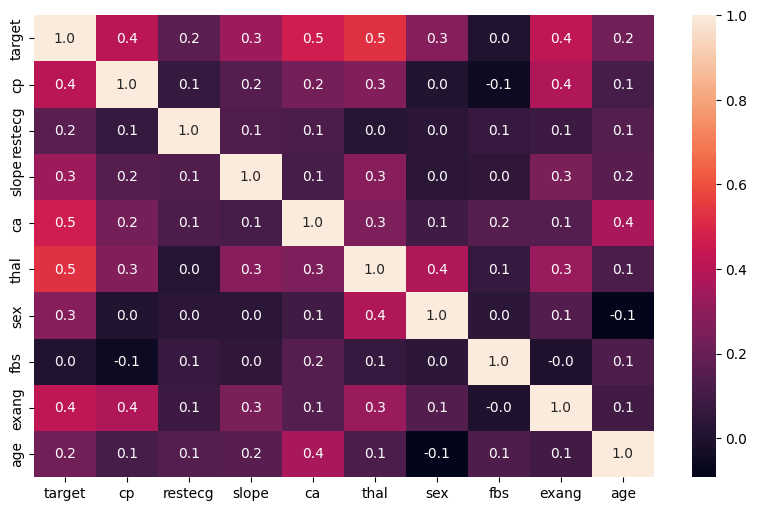

In [154]:
#Correlation matrix seaborn
plt.figure(figsize=(10,6))
sns.heatmap(only_categorical.corr(),annot=True,fmt='.1f')
plt.show()






* We can see that we have 'ca', 'thal',  that are moste corelated with the target with 50%

* We have 'sex' which is correlated with 'thal'

* We have 'exang' with 'cp'

       --> So we will base our Correpondance analysis on the 2 last cases 

In [124]:
sex_thal_contingancyTab = pd.crosstab(only_categorical['sex'], only_categorical['thal'])
exang_cp__contingancyTab = pd.crosstab(only_categorical['exang'], only_categorical['cp'])

In [136]:
sex_thal_contingancyTab

thal,3.0,6.0,7.0
sex,,,
0,80,1,15
1,84,17,100


In [137]:
sex_thal_contingancyTab

thal,3.0,6.0,7.0
sex,,,
0,80,1,15
1,84,17,100


In [ ]:
ca = prince.CA(n_components=2,
                n_iter=3, 
                copy=True,
                check_input=True, 
                engine='sklearn', 
                random_state=42)
ca = ca.fit(sex_thal_contingancyTab)

In [128]:
#Display eigenvalues
print(ca.eigenvalues_summary)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.209       100.00%                    100.00%


* We observe that a single component captures 100% of the variance in our Correspondence Analysis. This result can be explained by the limited number of categories present in the two categorical variables (sex and thal) used in the analysis. Since sex is binary and thal has only three distinct values, there is insufficient variability to justify additional components. As a result, the entire association between these variables is effectively captured along a single dimension.

In [129]:
print(ca.total_inertia_)

0.2088943353915631


In [ ]:
row_coords = ca.row_coordinates(sex_thal_contingancyTab)

col_coords = ca.column_coordinates(sex_thal_contingancyTab)

row_coords


,0
exang,
0,-0.318298
1,0.656285


In [134]:
col_coords

,0
cp,
1,-0.325578
2,-0.522351
3,-0.413821
4,0.474864


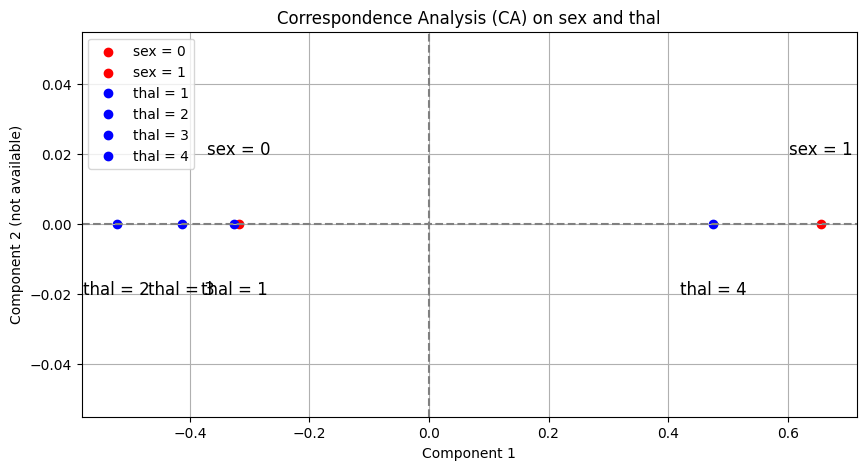

In [ ]:

# row_coords
sex_coords = {
    0: 0.567859,
    1: -0.271216
}

#col_coords
thal_coords = {
    3.0: 0.351868,
    6.0: -0.572313,
    7.0: -0.412215
}

plt.figure(figsize=(10, 5))

# Tracer les points pour 'sex'
for key, value in sex_coords.items():
    plt.scatter(value, 0, label=f'sex = {key}', color='red')
    plt.text(value, 0.02, f'sex = {key}', ha='center', fontsize=12)

# Tracer les points pour 'thal'
for key, value in thal_coords.items():
    plt.scatter(value, 0, label=f'thal = {key}', color='blue')
    plt.text(value, -0.02, f'thal = {key}', ha='center', fontsize=12)

# Lignes de référence
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Titres et légendes
plt.title('Correspondence Analysis (CA) on sex and thal')
plt.xlabel('Component 1')
plt.ylabel('Component 2 (not available)')
plt.grid(True)
plt.legend()
plt.show()


As previously noted, due to the limited variability in our two categorical variables, we were able to capture all the information in a single component, which is represented along one dimension. Based on the results of our Correspondence Analysis, we can interpret the associations as follows:

* sex = 0 (male) is closer to thal = 3, suggesting a potential dependency between these two categories.

* sex = 1 (female) is positioned closer to thal = 6 and thal = 7, with a stronger association towards thal = 7.

These associations indicate that there might be a relationship between the patient's sex and the observed values of thalassemia (thal). However, given the limited number of categories, caution should be exercised in over-interpreting these results.

In [ ]:

ca = prince.CA(n_components=2,
                n_iter=3, 
                copy=True,
                check_input=True, 
                engine='sklearn', 
                random_state=42)
ca = ca.fit(exang_cp__contingancyTab)
sex_thal_contingancyTab

cp,1,2,3,4
ca,,,,
0.0,16,37,56,65
1.0,3,8,20,34
2.0,4,3,2,29
3.0,0,1,5,14


In [ ]:
row_coords = ca.row_coordinates(exang_cp__contingancyTab)

col_coords = ca.column_coordinates(exang_cp__contingancyTab)
row_coords

,0,1
ca,,
0.0,-0.209157,-0.044949
1.0,0.079015,0.154476
2.0,0.602426,-0.214450
3.0,0.418257,0.296467


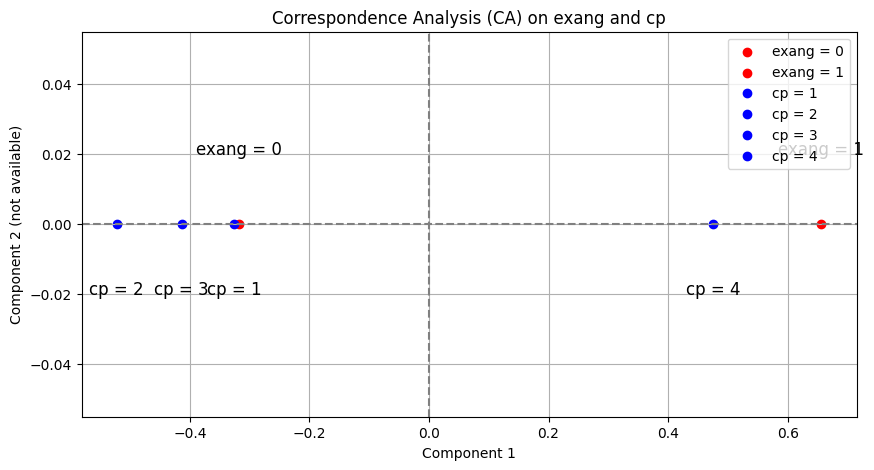

In [143]:
exang_coords = {
    0:-0.318298,
    1:0.656285
}

#col_coords
thal_coords = {
    1:-0.325578,
    2:-0.522351,
    3:-0.413821,
    4:0.474864
}

plt.figure(figsize=(10, 5))

# Tracer les points pour 'sex'
for key, value in sex_coords.items():
    plt.scatter(value, 0, label=f'exang = {key}', color='red')
    plt.text(value, 0.02, f'exang = {key}', ha='center', fontsize=12)

# Tracer les points pour 'thal'
for key, value in thal_coords.items():
    plt.scatter(value, 0, label=f'cp = {key}', color='blue')
    plt.text(value, -0.02, f'cp = {key}', ha='center', fontsize=12)

# Lignes de référence
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Titres et légendes
plt.title('Correspondence Analysis (CA) on exang and cp')
plt.xlabel('Component 1')
plt.ylabel('Component 2 (not available)')
plt.grid(True)
plt.legend()
plt.show()


* We can se that cp {1, 2, 3 } are more closer to exang =0, and cp =4 is closer to exang = 1

#### Since the CA between binary variables yielded only one component, we will expand the analysis to include a two-component CA, this time using the 'ca' and 'cp' features. 

In [184]:

ca_cp__contingancyTab = pd.crosstab(only_categorical['cp'], only_categorical['ca'])
ca = prince.CA(n_components=2,
                n_iter=3, 
                copy=True,
                check_input=True, 
                engine='sklearn', 
                random_state=42)
ca = ca.fit(ca_cp__contingancyTab)
ca_cp__contingancyTab

ca,0.0,1.0,2.0,3.0
cp,,,,
1,16,3,4,0
2,37,8,3,1
3,56,20,2,5
4,65,34,29,14


In [185]:
ca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.085,82.30%,82.30%
1,0.018,17.59%,99.89%


* The first component captures 82.3% of the variance, and with the cumulative value approaching 100%, we have effectively captured all the information. This is due to the limited variability in our data, given that both variables only have 4 categories each.

In [186]:
row_coords = ca.row_coordinates(ca_cp__contingancyTab)

col_coords = ca.column_coordinates(ca_cp__contingancyTab)
row_coords

,0,1
cp,,
1,-0.104226,0.358792
2,-0.341257,0.117088
3,-0.282164,-0.145159
4,0.299566,-0.013672


In [187]:
ca.plot(ca_cp__contingancyTab,
        x_component = 0,#First component
        y_component = 1,#Second component
        show_row_markers=True,
        show_column_markers=True,#
        show_row_labels=True,
        show_column_labels=True

)

alt.LayerChart(...)

* we can observe that cp=2 is closer to ca =0, suggesting a potential relationship between these two categories. * 

* Additionally, ca = 3 appears to be distinctly separated from the other points, indicating that it may represent a unique pattern or behavior that is not strongly associated with the other categories of chest pain

In [188]:

ca_cp__contingancyTab = pd.crosstab(only_categorical['cp'], only_categorical['age'])
ca = prince.CA(n_components=2,
                n_iter=3, 
                copy=True,
                check_input=True, 
                engine='sklearn', 
                random_state=42)
ca = ca.fit(ca_cp__contingancyTab)
ca_cp__contingancyTab

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
cp,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,1,0,1,0,1,0,...,1,1,0,0,2,0,0,0,0,0
2,1,1,1,0,0,0,0,6,1,0,...,0,1,0,0,0,1,1,1,0,0
3,0,0,0,2,0,3,0,3,3,2,...,3,1,3,3,1,1,1,0,1,0
4,0,0,3,0,0,1,2,1,3,5,...,4,4,6,1,0,2,1,0,0,1


In [189]:
ca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.220,39.76%,39.76%
1,0.199,35.92%,75.68%


In [190]:
row_coords = ca.row_coordinates(ca_cp__contingancyTab)

col_coords = ca.column_coordinates(ca_cp__contingancyTab)
row_coords

,0,1
cp,,
1,1.313729,0.730742
2,-0.704423,0.715053
3,-0.080935,-0.503438
4,0.077596,-0.070840


In [191]:
ca.plot(ca_cp__contingancyTab,
        x_component = 0,#First component
        y_component = 1,#Second component
        show_row_markers=True,
        show_column_markers=True,#
        show_row_labels=True,
        show_column_labels=True

)

alt.LayerChart(...)

**We can observe that:**

* cp=4 is closer to individuals with ages between 58 and 77.

* cp=3 is closer to individuals with ages between 51 and 67.

* cp=2 is closer to individuals with ages between 41 and 56.

This suggests that the level of chest pain (cp) tends to increase with age. We can hypothesize that as individuals get older, they may experience more severe chest pain, possibly due to underlying health conditions associated with aging.

In [204]:
column_contributions = ca.column_contributions_
column_contributions
row_contributions = ca.row_contributions_
row_contributions

,0,1
1,0.606885,0.207866
2,0.371731,0.424034
3,0.008312,0.356039
4,0.013072,0.012061


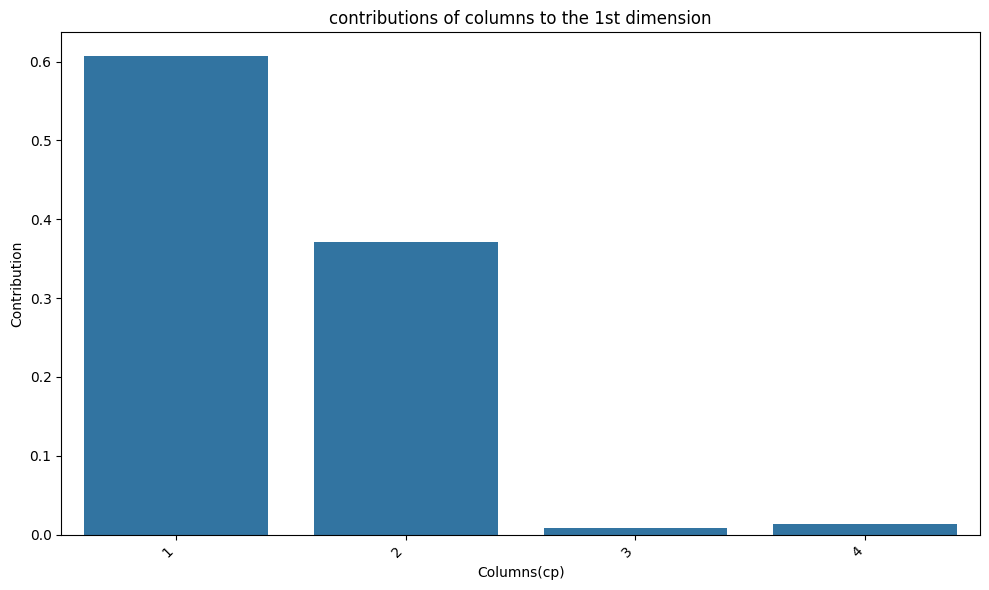

In [206]:
#column_contributions
contrib_df =row_contributions.iloc[:, 0] 

plt.figure(figsize=(10,6))
sns.barplot(x=contrib_df.index, y=contrib_df.values)
plt.title('contributions of columns to the 1st dimension')
plt.xlabel('Columns(cp)')
plt.ylabel('Contribution')
plt.xticks(rotation=45, ha='right')#rOtate the labels for readability
plt.tight_layout()
plt.show()


* We can observe that cp=1 and cp=2 contribute the most to the first component (component 0).
 The contribution of these categories to the first component means that they are more related to the underlying patterns in the data. 

In [207]:
only_categorical['cp'].value_counts()

cp
4    142
3     83
2     49
1     23
Name: count, dtype: int64

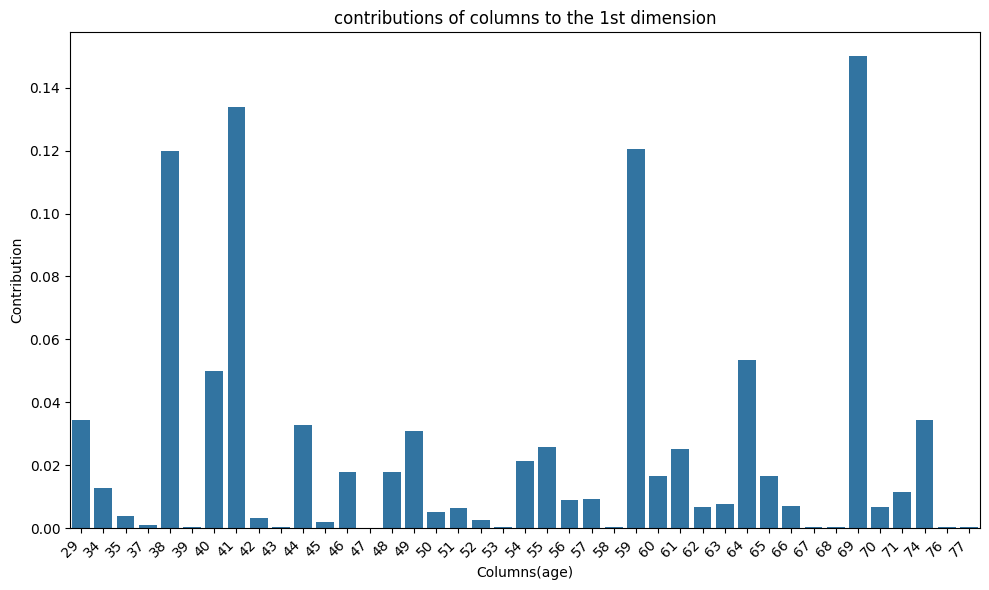

In [202]:
#column_contributions
contrib_df =column_contributions.iloc[:, 0] 

plt.figure(figsize=(10,6))
sns.barplot(x=contrib_df.index, y=contrib_df.values)
plt.title('contributions of columns to the 1st dimension')
plt.xlabel('Columns(age)')
plt.ylabel('Contribution')
plt.xticks(rotation=45, ha='right')#rOtate the labels for readability
plt.tight_layout()
plt.show()


* We can observe that the contribution of age is not homogeneous. There are peaks at ages 69, 59, 38, and 41. This could be attributed to the distribution of ages in our dataset, which is not uniform.